# A Comparative Analysis of Machine Learning Techniques for Credit Card Fraud Detection
By Lana Bracken

## Abstract

This study investigates the effectiveness of machine learning models for credit card fraud detection. I compare the performance of logistic regression, random forest, and neural network models using a provided dataset of transactions labeled as fraudulent or legitimate. My analysis reveals that logistic regression and random forest models outperform the neural network in terms of accuracy, precision, and Area Under the Curve (AUC) score. However, logistic regression emerges as the most effective choice due to its significantly faster training time, a crucial factor for adapting the model to evolving fraud tactics.
<br><br>
Further analysis of the logistic regression model's coefficients identifies V14, V16, and V3 as the features with the strongest influence on the model's predictions. Interestingly, all three features have negative coefficients, suggesting that higher values of these features are associated with a lower likelihood of fraud being predicted. Additionally, the limited number of features exhibiting a positive relationship with fraud highlights a potential area for improvement in identifying fraudulent transactions.
<br><br>
These findings suggest that logistic regression is a well-suited model for credit card fraud detection in this scenario, balancing accuracy with fast training times. However, future exploration could involve incorporating additional features or techniques to enhance the model's ability to detect fraudulent activity.


## Introduction


Credit card fraud occurs when someone uses credit card information without permission. There are several ways fraudsters can accomplish this, some of which include the physical card while most of the fraud does not require the card to be present.
<br><br>
According to Javelin Strategy & Research (2022), credit card fraud resulted in total losses of $38.5 billion in the United States [https://javelinstrategy.com/research]. This financial burden affects companies as well as individuals. The Federal Trade Commission (2024) reported a 53% increase in credit card fraud compared to 2019.
<br><br>
Machine learning algorithms are a powerful weapon in the fight against credit card fraud. However, choosing the right algorithm is crucial, and ongoing optimization is essential to maintain peak performance. This paper analyzes three algorithms, comparing their effectiveness and execution times. Since speed is vital, it carries much weight when determining the best solution.

## Literature Review

Recent research in credit card fraud detection (CCFD) emphasizes the effectiveness of machine learning (ML) and deep learning techniques at identifying fraudulent transactions.  For instance, works by Fu et al. (2016) and Zorion, et al. (2023) achieve high accuracy in credit card fraud detection using deep learning architectures, while acknowledging the challenges of imbalanced datasets common in fraud scenarios.  Additionally, research by Bodepudi (2021) explores unsupervised anomaly detection methods to identify outliers which might represent fraudulent activity.  These studies highlight the opportunities for researchers to continuously develop and refine ML algorithms to combat increasingly sophisticated fraud attempts.

## Research Questions

1.	What machine learning algorithms perform better at predicting credit card fraud?
2.	What three variables contribute the most to the algorithm’s performance?
3.	What is the relationship to the dependent variable (Class) of the three most important independent variables? Positive or negative?  


## Methodology

**Dataset.** The dataset contains a subset of transactions made by European cardholders during September 2013. The original, full-sized dataset was collected during a research collaboration of the Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) and ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The full-sized dataset (N = 284,807) and list of researchers involved is available at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud. A smaller dataset more amenable to working in Google Colab (N = 10,000) was compiled by Sean Humpherys and includes all the cases of fraud (n = 492) present in the original dataset and a random sampling of non-fraud cases (n = 9508). The dataset is imbalanced with only 4.92% of transactions being fraudlent. The smaller dataset is available at https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv <br><br>
**Dependent Variable.** The binary dependent variable represents the detection of a fraudulent transaction. A value of 0 represents a non-fraudulent transaction whereas 1 represents a fraudulent transaction. The dependent variable is labeled *Class*.<br><br>
**Independent Variables.**
*   *Time*: The time difference (in seconds) between the current transaction and the very first transaction in the original dataset.
*   *V1* through *V28*: A PCA Dimensionality reduction was performed to protect sensitive features. To protect privacy, the values are meaningless by themselves, but the relationship to the dependent variable is preserved.
*   *Amount*: The amount of the credit card transaction in Euros.
<br><br>

**Algorithms.**

*   Logistic Regression: This algorithm classifies data into two categories which are fraudulent and non-fraudulent transactions for this data. This is done by creating a linear relationship between the independent variables and the probability of being fraudulent.
*   Random Forest: This algorithm also classifies data into two categories, fraudulent and non-fraudulent transactions. Random Forest utilizes decision trees to make a prediciton on a subset of independent variables. The final prediction is based on the majority of the outcome from all the trees.
*   Neural Networks: This algorithm will be used to classify data, but also can be used for regression tasks. Neural Networks are inspired by the human brain. They consist of layers of nodes that process information based on weights and biases. The inner workings are complex and often compared to a black box.


## Results

After loading the data, a few steps were taken to obtain an overview and understanding of the transactions.

In [ ]:
# Load the credit card data
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/sean-humpherys/randomfilestorage/main/cc_transactions_10000.csv')
# show an overview of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,94556.430200,-0.232423,0.179783,-0.357002,0.212654,-0.124602,-0.070630,-0.261804,0.034599,-0.111454,...,0.034720,0.003403,-0.000442,-0.009036,-0.005892,0.001819,0.009840,0.004504,88.343145,0.049200
std,47476.185696,2.591826,1.970276,2.599102,1.802081,1.894479,1.400646,2.284173,1.848990,1.333441,...,1.112734,0.771793,0.637262,0.609786,0.538342,0.482085,0.484606,0.335693,224.618573,0.216296
min,0.000000,-30.552380,-29.336007,-31.103685,-4.790224,-22.105532,-17.282140,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.535092,-7.263482,-8.307955,0.000000,0.000000
25%,54051.750000,-1.008727,-0.567822,-1.074893,-0.806092,-0.724259,-0.820519,-0.624710,-0.210099,-0.713535,...,-0.221082,-0.539801,-0.168963,-0.361972,-0.328923,-0.330272,-0.069869,-0.052267,4.937500,0.000000
50%,85083.500000,-0.061033,0.111359,0.081684,0.055539,-0.057702,-0.301126,0.020360,0.030040,-0.075087,...,-0.018758,0.008368,-0.012581,0.034864,0.017182,-0.048559,0.004797,0.012732,21.000000,0.000000
75%,139004.750000,1.281665,0.896952,0.966433,0.900644,0.637133,0.374729,0.576932,0.356684,0.578514,...,0.204659,0.525961,0.153982,0.429143,0.353553,0.255971,0.106253,0.086981,79.000000,0.000000
max,172768.000000,2.398119,22.057729,3.770236,12.114672,28.516513,15.323769,15.915767,20.007208,7.929051,...,27.202839,8.361985,13.750136,3.951679,2.782860,2.859167,4.610936,15.373170,5627.060000,1.000000


In [ ]:
# Statistics for dependent variable - Class
class_counts = df['Class'].value_counts(normalize=True) * 100
print(class_counts)

Class
0    95.08
1     4.92
Name: proportion, dtype: float64


In [ ]:
# does df have any null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Descriptive Statistics.**

The dataset contains 10,000 transactions, of which 95.08% are non-fraudulent and 4.92% are fraudulent transactions. This equates to 9,508 non-fraudulent and 492 fraudulent transactions. Credit card fraud detection presents a classic case of class imbalance. Fortunately, this imbalance reflects the success of fraud prevention measures. The vast majority of transactions are legitimate, highlighting the effectiveness of existing security protocols. All 31 variables for the 10,000 records contain a value and are not null. The dependent variable (Class) is binary and contains only values of 0 and 1.
<br><br>
To reduce dimensionality and address potential multicollinearity, a correlation matrix analysis was conducted. Features exhibiting high correlation were removed from the dataset.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the highly correlated items
highly_correlated_items = []
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > 0.7:
      highly_correlated_items.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i,j]))

# Display the highly correlated items
print(highly_correlated_items)

[('V12', 'V14', 0.7108386700133295), ('V12', 'V17', 0.7319343308228563), ('V12', 'Class', -0.7021638604725197), ('V14', 'Class', -0.7554460940445227), ('V16', 'V17', 0.7473165511771639)]


In [ ]:
# remove v17 from df since it is highly correlated to V12 and V16
df = df.drop('V17', axis=1)
#df = df.drop('V16', axis=1)
#df = df.drop('V14', axis=1)

Highly correlated for this dataset was declared to be greater than +/- .7. Performing the correlation matrix showed that V17 is highly correlated with both V12 (.73) and V16 (.75). V17 was removed from the dataset. One could also experiment removing V12, V14 and/or V16.
<br><br>
Next, the data was split into a training and test set. Crucially, the test set includes transactions chronologically following the training data.

In [ ]:
# set decimal places to use
dp = 3
# Sort df by time in ascending order.
df = df.sort_values(by='Time', ascending=True)
df.reset_index(inplace=True, drop=True)

# Split the data into training and test sets, with the test set containing the last 20% of the data.
train_df = df.iloc[:int(len(df) * 0.8)]
test_df = df.iloc[int(len(df) * 0.8):]

num_train_fraudulent = train_df['Class'].value_counts()[1]
num_test_fraudulent = test_df['Class'].value_counts()[1]
print(f"Number of training samples: {len(train_df)}, of which {num_train_fraudulent} are fraudulent")
print(f"Number of testing samples: {len(test_df)}, of which {num_test_fraudulent} are fraudulent")

proportion_train_fraudulent = round(num_train_fraudulent/len(train_df),dp)
proportion_test_fraudulent = round(num_test_fraudulent/len(test_df),dp)

print(f"Proportion of fraudulent transactions in training set: {proportion_train_fraudulent}")
print(f"Proportion of fraudulent transactions in test set: {proportion_test_fraudulent}")


Number of training samples: 8000, of which 417 are fraudulent
Number of testing samples: 2000, of which 75 are fraudulent
Proportion of fraudulent transactions in training set: 0.052
Proportion of fraudulent transactions in test set: 0.038


The training set contains 8,000 transactions, of which 417 are fraudulent. The fraudulent transactions represent 5.2% of the training set. The test set contains 2,000 transactions, of which 75 are fraudulent. The fraudulent transactions represent 3.8% of the test set.
<br><br>
To optimize model performance, the numerical features in both the training and testing sets were scaled. Scaling ensures all features contribute equally to the model's predictions. This is particularly important for algorithms like logistic regression, random forests, and neural networks, which rely on distance calculations or gradient descent for optimization. Unscaled features with significantly different ranges can dominate these algorithms, leading to biased results.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# Scales the numerical features in both training and test datasets
def scaleData(train, test):
  scaler = StandardScaler()
  # Fit the scaler on the combined numerical features from both datasets
  combined_features = pd.concat([train, test], ignore_index=True)
  scaler.fit(combined_features.select_dtypes(include=[np.number]))

  # Transform datasets in-place
  train.update(scaler.transform(train.select_dtypes(include=[np.number])))
  test.update(scaler.transform(test.select_dtypes(include=[np.number])))

  return train, test

# scale data
train_df, test_df = scaleData(train_df, test_df)

To identify the best hyperparameter configurations for each model, GridSearchCV was employed. This technique systematically evaluates a predefined grid of parameter values and selects the combination that yields the best performance on a validation set.  For all models, random_state=0 was set to ensure reproducibility of results across model runs.
<br><br>
However, it's important to note a special case with logistic regression when using the liblinear solver. This solver inherently shuffles the training data before fitting the model. In fraud detection, the chronological order of transactions can be crucial information. By setting random_state=0 specifically for logistic regression with liblinear, we ensure consistent shuffling across runs, preserving the temporal order of the data within the training set.

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import average_precision_score, roc_auc_score
import time

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=0, solver='lbfgs', max_iter= 500)

start_time=time.time()
# Fit the model on the training data
lr_model.fit(train_df.drop('Class', axis=1), train_df['Class'])
lr_train_execution_time=round(time.time()-start_time, dp)

start_time=time.time()
# Predict on the test data
lr_predictions = lr_model.predict(test_df.drop('Class', axis=1))
lr_prediction_execution_time=round(time.time()-start_time, dp)

# Evaluate the model performance
print(confusion_matrix(test_df['Class'], lr_predictions))

print(f"Train Execution time: {lr_train_execution_time}")
print(f"Prediction Execution time: {lr_prediction_execution_time}")

# Calculate the AOC
lr_aoc = round(accuracy_score(test_df['Class'], lr_predictions), dp)
print(f"AOC: {lr_aoc}")

# Calculate the average precision
lr_average_precision = round(average_precision_score(test_df['Class'], lr_predictions), dp)
print(f"Average precision: {lr_average_precision}")
lr_AUC_ROC = round(roc_auc_score(test_df['Class'], lr_predictions), 3)
print(f"AUC ROC: {lr_AUC_ROC}")

[[1925    0]
 [  22   53]]
Train Execution time: 0.526
Prediction Execution time: 0.01
AOC: 0.989
Average precision: 0.718
AUC ROC: 0.853


The logistic regression model achieved promising results in classifying the credit card fraud. An AOC of .989 is very close to 1, which indicates very good performance in classification. The average precision of .718 indicates the model's precision in correctly classifying fraudulent transactions out of all the predicted positives. The confusion matrix indicates the model correctly classified 1,925 legitimate transactions (True Negatives) and 0 fraudulent transactions that were actually legitimate (False Positives). The model also identified 53 fraudulent transactions correctly (True Positive), however it incorrectly classified 22 transactions as legitimate (False Negative). This model needs improvement in reducing False Negatives.

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=0, n_estimators=150, max_depth= None, min_samples_leaf = 4, min_samples_split= 2)

start_time=time.time()
# Fit the model on the training data
rf_model.fit(train_df.drop('Class', axis=1), train_df['Class'])
rf_train_execution_time=round(time.time()-start_time, dp)

start_time=time.time()
# Predict on the test data
rf_predictions = rf_model.predict(test_df.drop('Class', axis=1))
rf_prediction_execution_time=round(time.time()-start_time, 3)

# Evaluate the model performance
print(confusion_matrix(test_df['Class'], rf_predictions))

print(f"Train Execution time: {rf_train_execution_time}")
print(f"Prediction Execution time: {rf_prediction_execution_time}")

# Calculate the AOC
rf_aoc = round(accuracy_score(test_df['Class'], rf_predictions), 3)
print(f"AOC: {rf_aoc}")

# Calculate the average precision
rf_average_precision = round(average_precision_score(test_df['Class'], rf_predictions), 3)
print(f"Average precision: {rf_average_precision}")
rf_AUC_ROC = round(roc_auc_score(test_df['Class'], rf_predictions), 3)
print(f"AUC ROC: {rf_AUC_ROC}")

[[1923    2]
 [  19   56]]
Train Execution time: 18.713
Prediction Execution time: 0.096
AOC: 0.99
Average precision: 0.73
AUC ROC: 0.873


The random forest model demonstrates strong performance in detecting fraudulent transactions by achieving a slightly higher AOC compared to the logistic regression model (0.99 vs 0.989) and a higher AUC (0.8753 vs 0.853). Similar to the logistic regression model, the value of the average precision (0.73) demonstrates good precision in identifying true positives (fraudulent transactions) from predicted positives. The confusion matrix explains the model correctly classified 1,923 legitimate transactions (True Negatives), however it identified 2 fraudulent transactions that were actually legitimate (False Positive). The model correctly classified 56 transactions as legitimate (True  Positive), but incorrectly classified 19 as legitimate instead of fraudulent transactions (False Negative). This model could improve by reducing False Negatives and False Positives.

In [ ]:
from sklearn import neural_network
# Initialize the Logistic Regression model
nn_model = neural_network.MLPClassifier(solver='adam', activation='relu', alpha=0.2, hidden_layer_sizes=(16,), random_state=0)

start_time=time.time()
# Fit the model on the training data
nn_model.fit(train_df.drop('Class', axis=1), train_df['Class'])
nn_train_execution_time=round(time.time()-start_time, 3)

start_time=time.time()
# Predict on the test data
nn_predictions = nn_model.predict(test_df.drop('Class', axis=1))
nn_prediction_execution_time=round(time.time()-start_time, 3)

# Evaluate the model performance
print(confusion_matrix(test_df['Class'], nn_predictions))

print(f"Train Execution time: {nn_train_execution_time}")
print(f"Prediction Execution time: {nn_prediction_execution_time}")

# Calculate the AOC
nn_aoc = round(accuracy_score(test_df['Class'], nn_predictions), 3)
print(f"AOC: {nn_aoc}")

# Calculate the average precision
nn_average_precision = round(average_precision_score(test_df['Class'], nn_predictions), 3)
print(f"Average precision: {nn_average_precision}")
nn_AUC_ROC = round(roc_auc_score(test_df['Class'], nn_predictions), 3)
print(f"AUC ROC: {nn_AUC_ROC}")


[[1925    0]
 [  56   19]]
Train Execution time: 1.173
Prediction Execution time: 0.015
AOC: 0.972
Average precision: 0.281
AUC ROC: 0.627


The neural network model achieved a high AOC (0.972) also indicating a good overall ability to distinguish between fraudulent and legitimate transactions. The low average precision of .0281 is concerning. This indicates a high number of False Positives. Restated, of out all the transactions that the model detected as fraud, only 28.1% were actually fraudulent. Having a value of 0.627 for AUC ROC suggests this model might not be significantly better than random guessing to classify fraud. The confusion matrix displays the model correctly identifying all 1,925 legitimate transactions (True Negative). However, the model incorrectly identified 56 as legitimate (False Positive) and only correctly identified 19 transactions as fraudulent (True Positive). This model could improve by reducing False Positives.

### Results for Research Question 1
####Which machine learning models offer the most effective performance for credit card fraud detection?
Identifying the most effective machine learning models for credit card fraud detection requires a delicate balance between accurately detecting fraudulent transactions and minimizing false positives (flagging legitimate transactions as fraud).


**Performance Metrics**.

Tables that summarize key performance metrics for each model allows for easy side-by-side comparisons of the models' strengths and weaknesses.

In [ ]:
# Performance comparisions
import pandas as pd
model_performance = [
    {"Model": "Logistic Regression", "AOC": lr_aoc, "AUC ROC": lr_AUC_ROC, "Average Precision": lr_average_precision},
    {"Model": "Random Forest", "AOC": rf_aoc, "AUC ROC": rf_AUC_ROC, "Average Precision": rf_average_precision},
    {"Model": "Neural Networks", "AOC": nn_aoc, "AUC ROC": nn_AUC_ROC, "Average Precision": nn_average_precision},
]
pd.DataFrame(model_performance, index=None)

,Model,AOC,AUC ROC,Average Precision
0,Logistic Regression,0.989,0.853,0.718
1,Random Forest,0.990,0.873,0.730
2,Neural Networks,0.972,0.627,0.281


In [ ]:
# Execution time comparisions
import pandas as pd
model_execution = [
    {"Model": "Logistic Regression", "Train Time": lr_train_execution_time, "Prediction Time": lr_prediction_execution_time},
    {"Model": "Random Forest", "Train Time": rf_train_execution_time, "Prediction Time": rf_prediction_execution_time},
    {"Model": "Neural Networks", "Train Time": nn_train_execution_time, "Prediction Time": nn_prediction_execution_time},
]
pd.DataFrame(model_execution, index=None)

,Model,Train Time,Prediction Time
0,Logistic Regression,0.526,0.010
1,Random Forest,18.713,0.096
2,Neural Networks,1.173,0.015


Generating a confusion matrix for each model in a graphical form visually shows the number of True Positives (correctly identified fraud), True Negatives (correctly identified legitimate transactions), False Positives (legitimate transactions flagged as fraud), and False Negatives (missed fraud).  

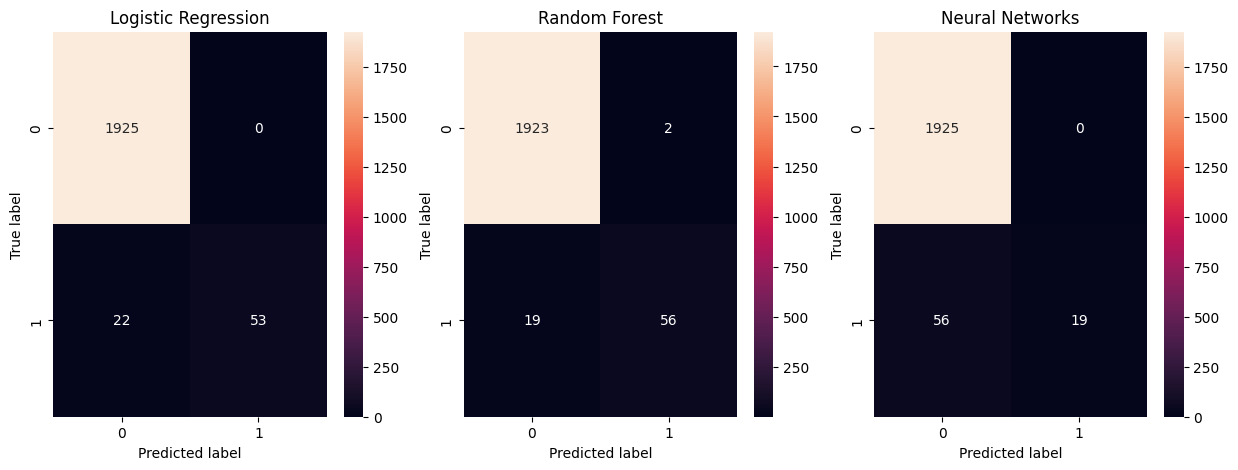

In [ ]:
# Display confusion matrix for each model
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, ax):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", ax=ax)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

# Plot each model's confusion matrix
plot_confusion_matrix(test_df['Class'], lr_predictions, axes[0])
axes[0].set_title("Logistic Regression")

plot_confusion_matrix(test_df['Class'], rf_predictions, axes[1])
axes[1].set_title("Random Forest")

plot_confusion_matrix(test_df['Class'], nn_predictions, axes[2])
axes[2].set_title("Neural Networks")

plt.show()

Plot Precision-Recall Curves (PRC) and Receiver Operating Characteristic (ROC) curves for each model. These curves provide additional insights into the model's performance trade-offs. The PRC shows the relationship between precision (reducing false positives) and recall (catching fraud). The ROC curve depicts the model's ability to distinguish between classes (fraudulent vs. legitimate) at various thresholds.

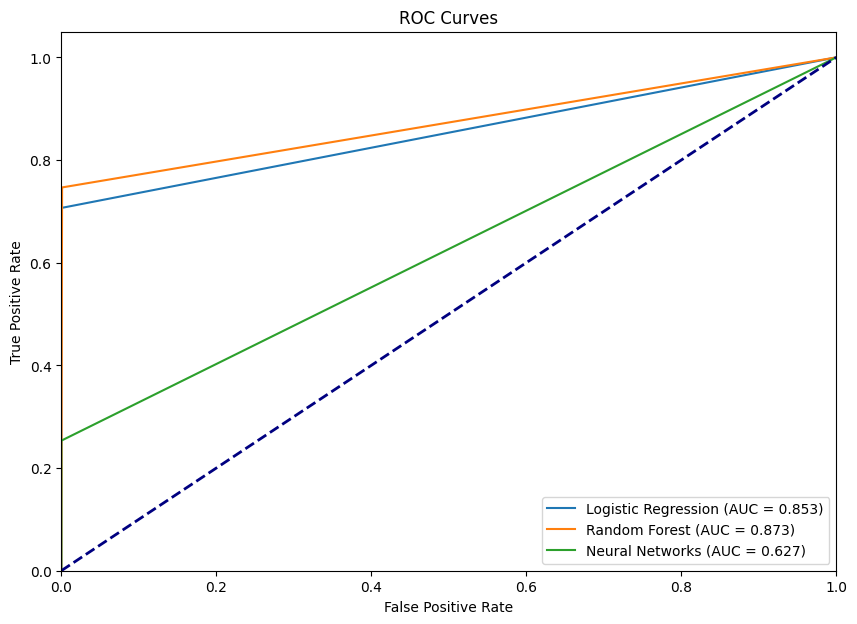

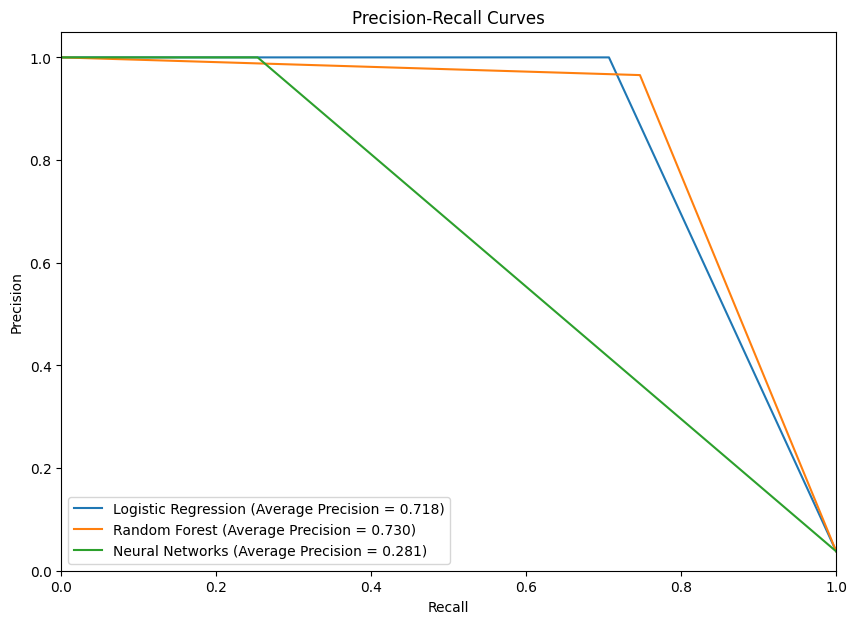

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

# Calculate the ROC curves and AUC metrics for each model
lr_fpr, lr_tpr, _ = roc_curve(test_df['Class'], lr_predictions)
rf_fpr, rf_tpr, _ = roc_curve(test_df['Class'], rf_predictions)
nn_fpr, nn_tpr, _ = roc_curve(test_df['Class'], nn_predictions)

# Calculate the precision-recall curves and average precision scores
lr_precision, lr_recall, _ = precision_recall_curve(test_df['Class'], lr_predictions)
rf_precision, rf_recall, _ = precision_recall_curve(test_df['Class'], rf_predictions)
nn_precision, nn_recall, _ = precision_recall_curve(test_df['Class'], nn_predictions)

# Plot the ROC curves
plt.figure(figsize=(10, 7))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_AUC_ROC:.3f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_AUC_ROC:.3f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Networks (AUC = {nn_AUC_ROC:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Plot the precision-recall curves
plt.figure(figsize=(10, 7))
plt.plot(lr_recall, lr_precision, label=f'Logistic Regression (Average Precision = {lr_average_precision:.3f})')
plt.plot(rf_recall, rf_precision, label=f'Random Forest (Average Precision = {rf_average_precision:.3f})')
plt.plot(nn_recall, nn_precision, label=f'Neural Networks (Average Precision = {nn_average_precision:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()


My analysis of the logistic regression, random forest, and neural network models for credit card fraud detection reveals that logistic regression and random forest outperform the neural network. This conclusion is based on the provided training and test datasets, chosen hyperparameters, and the resulting model statistics.
<br><br>
While both logistic regression and random forest achieve high AOC scores (0.989 and 0.99, respectively), and random forest has a higher AUC than logistic regression (0.873 and 0.853, respectively), execution time is a critical factor for real-world fraud detection. Logistic regression boasts a significant advantage here, with a training execution time 98.13% faster than random forest. This rapid training allows for frequent model updates to stay ahead of evolving fraudster tactics.
<br><br>
Furthermore, both models offer good precision, but logistic regression exhibits a slight edge with fewer False Positives (0) compared to random forest's 2. False positives can inconvenience legitimate customers, whereas False Negatives (missed fraud) pose a financial risk. However, logistic regression has a higher number of False Negatives (22) compared to random forest's 19. Out of all three, random forest scored the highest value for AUC (0.873) compared to logistic regression's 0.853 and neural networks's 0.627. AUC is less affected by class imbalance compared to accuracy, which credit card fraud is prone to.
<br><br>
Considering these factors, logistic regression emerges as the most effective model for this specific scenario based on the given data and chosen parameters. It offers a strong balance between accuracy, low false positive rate, and the critical advantage of fast training times for adapting to evolving fraud patterns.

### Results for Research Question 2
What three variables contribute the most to the logistic regression algorithm’s performance?

To identify the most impactful features for logistic regression performance in this scenario, we'll examine the absolute values of the coefficients generated by the model.

In [ ]:
# display coefs in order by absolute value beside their original value(to retain sign)
import pandas as pd
lr_coefs = pd.Series(lr_model.coef_[0], index=train_df.drop('Class', axis=1).columns).sort_values(ascending=True)
top_31_coefs = lr_coefs.abs().nlargest(31)
top_31_original_coefs = lr_coefs[top_31_coefs.index]

lr_coef_df = pd.DataFrame({
    'Original Coefficient': top_31_original_coefs,
    'Absolute Coefficient': top_31_coefs
})

print(lr_coef_df.to_string())


        Original Coefficient  Absolute Coefficient
V14                -0.785693              0.785693
V16                -0.780640              0.780640
V3                 -0.775652              0.775652
V22                 0.620137              0.620137
V4                  0.610572              0.610572
V8                 -0.583487              0.583487
V25                -0.557383              0.557383
V9                 -0.543595              0.543595
V13                -0.540557              0.540557
V15                -0.529178              0.529178
V10                -0.494643              0.494643
V12                -0.418456              0.418456
V1                  0.392405              0.392405
V7                  0.379040              0.379040
V21                 0.351801              0.351801
V11                -0.338688              0.338688
V2                 -0.336068              0.336068
V18                -0.311745              0.311745
V23                -0.214129   

Based on the absolute value of the coefficients, the three features with the most significant impact on the model's performance are V14, V16, and V3. It's worth noting that V17 was previously considered but removed due to high correlation with V16 and V12.

### Results for Research Question 3
What is the relationship to the dependent variable (Class) of the three most important independent variables? Positive or negative?



The sign of the three most important independent variables is negative. A negative sign indicates a negative relationship with the dependent variable (Class). Even though the coefficients are negative, their absolute values determine their impact in the model. So, V14, V16, and V3 are the most influential features, and higher values of these features are associated with a lower likelihood of fraud being predicted by the model.
<br><br>
One potential reason for the model's focus on True Negatives (correctly identifying legitimate transactions) could be the limited number of features with positive coefficients. Only 9 out of 31 features exhibit a positive relationship with the dependent variable (Class), indicating that the model might struggle to identify fraudulent transactions based on the current features. Another potential reason could be the already mentioned class imbalance of credit card fraud datasets.

## Conclusion

In conclusion, my analysis revealed the logistic regression and random forest models achieved greater performance compared to the neural network model for credit card detection based on the provided data and selected hyperparameters. While all three models generated high AOC scores, the logistic regression model surpassed the others as the most effective model due to its balance between accuracy, low False Positive rate, and its blazing-fast training speed. The rapid training allows the model to adapt and learn in the constantly changing world of credit card fraud by incorporating new data more frequently. Independent variables that contributed to the greatest influence on the model's ability to classify fraudulent transactions are V14, V16, and V3. These coefficients have a negative relationship with the dependent variable (Class). Further investigation could involve quantifying the financial and reputational impact of misclassifications, analysis of removing other highly correlated independent variables, and continual optimization of hyperparameters in each model.

## References


<p>Bodepudi, H. (2021) Credit Card Fraud Detection Using Unsupervised Machine Learning Algorithms. International Journal of Computer Trend and Technology. 69 (9) https://www.ijcttjournal.org/2021/Volume-69%20Issue-8/IJCTT-V69I8P101.pdf</p>
<p>Fu, K., Cheng, D., Tu, Y., Zhang, L. (2016). Credit Card Fraud Detection Using Convolutional Neural Networks. In: Hirose, A., Ozawa, S., Doya, K., Ikeda, K., Lee, M., Liu, D. (eds) Neural Information Processing. ICONIP 2016. Lecture Notes in Computer Science(), vol 9949. Springer, Cham. https://doi.org/10.1007/978-3-319-46675-0_531</p>
<p>Zorion, P. K., Sachan, L. , Chhabra, R.,  Pandey, V., Fatima, H., (2023) Credit Card Financial Fraud Detection Using Deep Learning. Available at SSRN: https://ssrn.com/abstract=4629093 or http://dx.doi.org/10.2139/ssrn.4629093</p>


